In [ ]:
import pandas as pd
import seaborn as sns
import os

import requests
import zipfile
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive = '/content/drive/MyDrive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
MODEL= drive+'model'


In [ ]:
# Setup path to data folder
data_path = Path(drive)
image_path = data_path / 'NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data'

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data.zip", "wb") as f:
        request = requests.get("https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/bbmmm4wgr8-4.zip")
        print("Downloading data...")
        f.write(request.content)

    with zipfile.ZipFile("/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data.zip", "r") as zip_ref:
        print("Unzipping data...")
        zip_ref.extractall("/content/drive/MyDrive/")

/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data directory exists.


In [ ]:
# with zipfile.ZipFile(image_path/'images.zip', "r") as zip_ref:
#         print("Unzipping data...")
#         zip_ref.extractall(image_path)

In [ ]:
for dirpath, dirnames, filenames in os.walk(image_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 10 images in '/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data'.
There are 1 directories and 2 images in '/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch'.
There are 0 directories and 3763 images in '/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/images'.
There are 0 directories and 237 images in '/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/images'.


In [ ]:
image_path

PosixPath('/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data')

In [ ]:
df = pd.read_csv(image_path/'ndb-ufes.csv')
df.head(10)

public_id  lesion_id  patient_id      path localization  larger_size  \
0          0         50          48  0000.png       Tongue          2.0   
1          1         50          48  0001.png       Tongue          2.0   
2          2         41          39  0002.png       Tongue          2.5   
3          3         41          39  0003.png       Tongue          2.5   
4          4         87          81  0004.png          Lip          1.5   
5          5         87          81  0005.png          Lip          1.5   
6          6        103          78  0006.png       Tongue          0.4   
7          7        103          78  0007.png       Tongue          0.4   
8          8        103          78  0008.png       Tongue          0.4   
9          9        103          78  0009.png       Tongue          0.4   

  tobacco_use alcohol_consumption sun_exposure gender skin_color  age_group  \
0         Yes                  No           No      M      Black          2   
1         Yes                  No           No      M      Black          2   
2         Yes              Former          Yes      M      White          1   
3         Yes              Former          Yes      M      White          1   
4      Former                 Yes          Yes      F      White          2   
5      Former                 Yes          Yes      F      White          2   
6          No                 Yes           No      F      White          1   
7          No                 Yes           No      F      White          1   
8          No                 Yes           No      F      White          1   
9          No                 Yes           No      F      White          1   

                    diagnosis dysplasia_severity       TaskII   TaskIII  \
0                        OSCC                NaN         OSCC  Presence   
1                        OSCC                NaN         OSCC  Presence   
2                        OSCC                NaN         OSCC  Presence   
3                        OSCC                NaN         OSCC  Presence   
4                        OSCC                NaN         OSCC  Presence   
5                        OSCC                NaN         OSCC  Presence   
6  Leukoplakia with dysplasia               Mild  Leukoplakia  Presence   
7  Leukoplakia with dysplasia               Mild  Leukoplakia  Presence   
8  Leukoplakia with dysplasia               Mild  Leukoplakia  Presence   
9  Leukoplakia with dysplasia               Mild  Leukoplakia  Presence   

                       TaskIV  
0                        OSCC  
1                        OSCC  
2                        OSCC  
3                        OSCC  
4                        OSCC  
5                        OSCC  
6  Leukoplakia with dysplasia  
7  Leukoplakia with dysplasia  
8  Leukoplakia with dysplasia  
9  Leukoplakia with dysplasia

In [ ]:
df.columns

Index(['public_id', 'lesion_id', 'patient_id', 'path', 'localization',
       'larger_size', 'tobacco_use', 'alcohol_consumption', 'sun_exposure',
       'gender', 'skin_color', 'age_group', 'diagnosis', 'dysplasia_severity',
       'TaskII', 'TaskIII', 'TaskIV'],
      dtype='object')

In [ ]:
df.drop(columns=['TaskIV'], axis=0, inplace=True)

In [ ]:
df.rename(columns={'TaskII':'OSCC','TaskIII':'dysplasia'}, inplace=True)

In [ ]:
df.head()

public_id  lesion_id  patient_id      path localization  larger_size  \
0          0         50          48  0000.png       Tongue          2.0   
1          1         50          48  0001.png       Tongue          2.0   
2          2         41          39  0002.png       Tongue          2.5   
3          3         41          39  0003.png       Tongue          2.5   
4          4         87          81  0004.png          Lip          1.5   

  tobacco_use alcohol_consumption sun_exposure gender skin_color  age_group  \
0         Yes                  No           No      M      Black          2   
1         Yes                  No           No      M      Black          2   
2         Yes              Former          Yes      M      White          1   
3         Yes              Former          Yes      M      White          1   
4      Former                 Yes          Yes      F      White          2   

  diagnosis dysplasia_severity  OSCC dysplasia  
0      OSCC                NaN  OSCC  Presence  
1      OSCC                NaN  OSCC  Presence  
2      OSCC                NaN  OSCC  Presence  
3      OSCC                NaN  OSCC  Presence  
4      OSCC                NaN  OSCC  Presence

In [ ]:
diagnosis = df['diagnosis'].value_counts()
diagnosis

OSCC                             91
Leukoplakia with dysplasia       89
Leukoplakia without dysplasia    57
Name: diagnosis, dtype: int64

In [ ]:
df['severity']= df['dysplasia_severity']

In [ ]:
df.loc[df['diagnosis']=='OSCC','severity'] = df.loc[df['diagnosis']=='OSCC','severity'].fillna('Cancer')
df.loc[df['diagnosis']=='Leukoplakia without dysplasia','severity'] = df.loc[df['diagnosis']=='Leukoplakia without dysplasia','severity'].fillna('Low')
df.head()

public_id  lesion_id  patient_id      path localization  larger_size  \
0          0         50          48  0000.png       Tongue          2.0   
1          1         50          48  0001.png       Tongue          2.0   
2          2         41          39  0002.png       Tongue          2.5   
3          3         41          39  0003.png       Tongue          2.5   
4          4         87          81  0004.png          Lip          1.5   

  tobacco_use alcohol_consumption sun_exposure gender skin_color  age_group  \
0         Yes                  No           No      M      Black          2   
1         Yes                  No           No      M      Black          2   
2         Yes              Former          Yes      M      White          1   
3         Yes              Former          Yes      M      White          1   
4      Former                 Yes          Yes      F      White          2   

  diagnosis dysplasia_severity  OSCC dysplasia severity  
0      OSCC                NaN  OSCC  Presence   Cancer  
1      OSCC                NaN  OSCC  Presence   Cancer  
2      OSCC                NaN  OSCC  Presence   Cancer  
3      OSCC                NaN  OSCC  Presence   Cancer  
4      OSCC                NaN  OSCC  Presence   Cancer

In [ ]:
severity = df['severity'].value_counts()
severity

Cancer      91
Mild        58
Low         57
Severe      16
Moderate    15
Name: severity, dtype: int64

In [ ]:
location = df['localization'].value_counts()
location

Tongue            79
Gingiva           59
Buccal mucosa     35
Floor of mouth    32
Lip               20
Palate            12
Name: localization, dtype: int64

In [ ]:
images_ds= df[['path','diagnosis']]
images_ds.head()

path diagnosis
0  0000.png      OSCC
1  0001.png      OSCC
2  0002.png      OSCC
3  0003.png      OSCC
4  0004.png      OSCC

In [ ]:
images_ds.iloc[0, 0]

'0000.png'

In [ ]:
images_ds.shape[0]

237

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Setup path for target directory
target_directory = image_path / 'images'
print(f"Target directory: {target_directory}")

Target directory: /content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/images


In [ ]:
def find_classes(images_ds: df) -> Tuple[List[str], Dict[str, int]]:

    # 1. Get the class names by scanning the target directory
    classes = sorted(images_ds['diagnosis'].unique())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [ ]:
classes, class_to_idx = find_classes(images_ds)

In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):

    # 1. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, path_df: df, transform=None) -> None:

        # Get all image paths, classes
        self.img_df = path_df

        # Set all images to proper path
        self.img_df['path'] = self.check_path(targ_dir)

        self.paths = list(self.img_df['path'])

        # Setup transforms
        self.transform = transform

        self.classes, self.class_to_idx = find_classes(path_df)

    # 2. check if its already in proper format
    def check_path(self, targ_dir):
        if str(targ_dir) in self.img_df.iloc[0,0]:
            return self.img_df['path'].astype('string')
        else:
            return str(targ_dir)+ '/' +  self.img_df['path'].astype('string')

    # 3. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.img_df.iloc[index, 0]
        return Image.open(image_path)

    # 4. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return self.img_df.shape[0]

    # 5. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.img_df.iloc[index, 1] # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [ ]:
target_directory

PosixPath('/content/drive/MyDrive/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/images')

In [ ]:
train_transforms = transforms.Compose([
    #transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir = target_directory,
                                      path_df = images_ds,
                                      transform= train_transforms)


<ipython-input-132-61c67a8b1793>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.img_df['path'] = self.check_path(targ_dir)


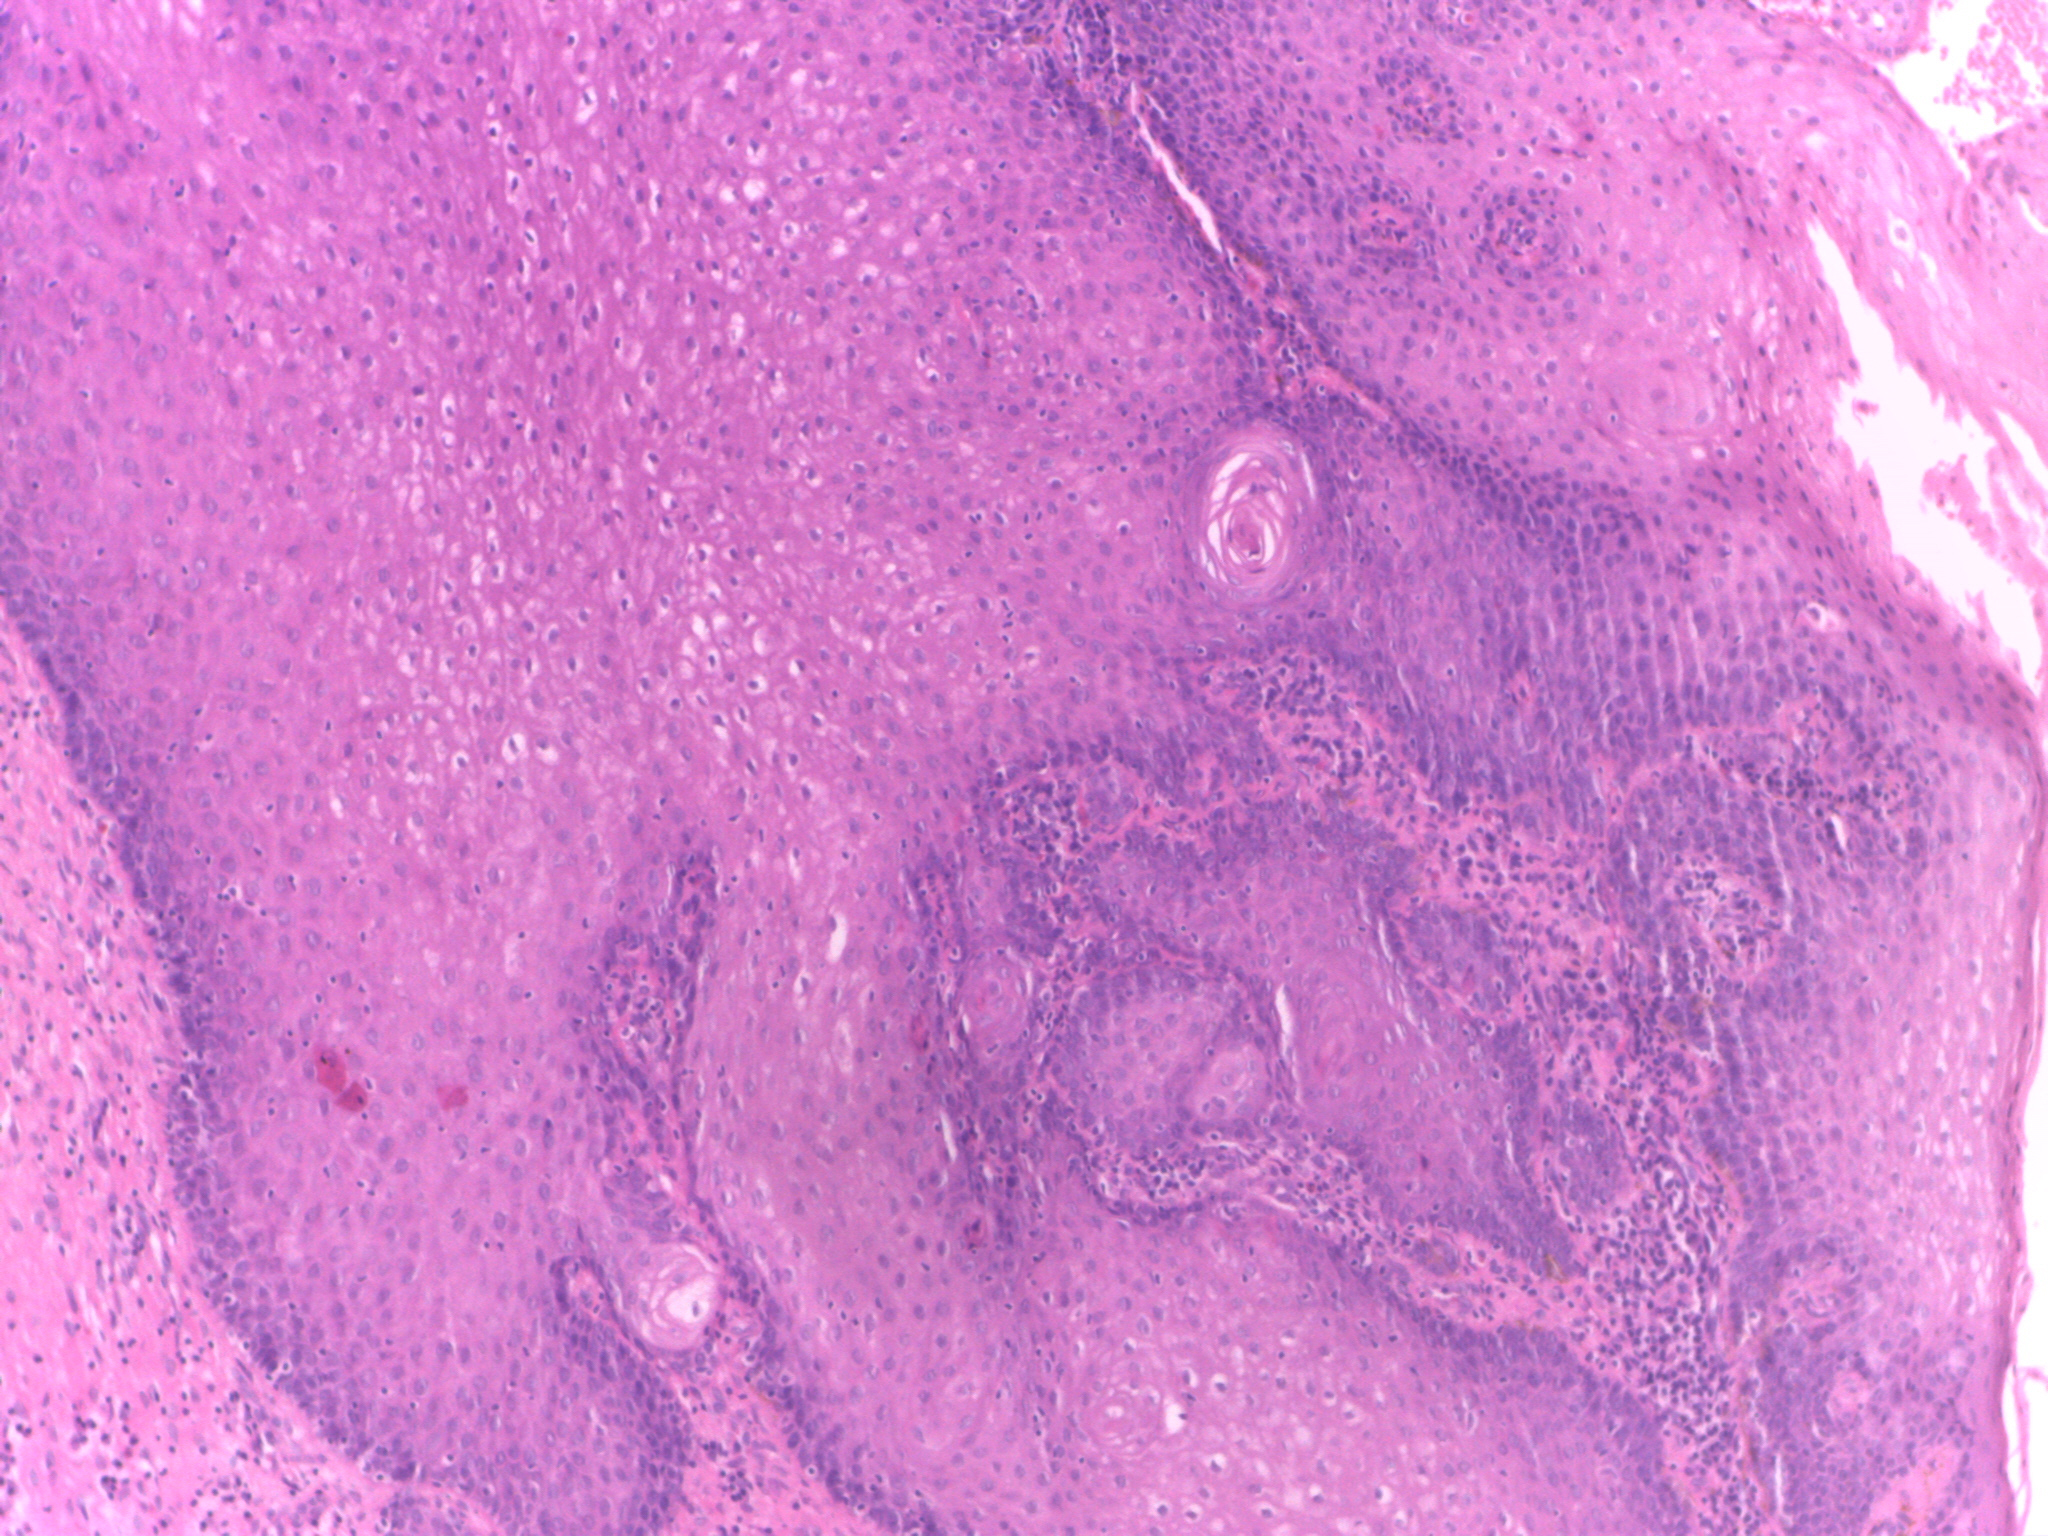

In [ ]:
train_data_custom.load_image(0)

In [ ]:
len(train_data_custom)

237

In [ ]:
import random
import matplotlib.pyplot as plt


In [ ]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

[16, 189, 223, 203, 81]


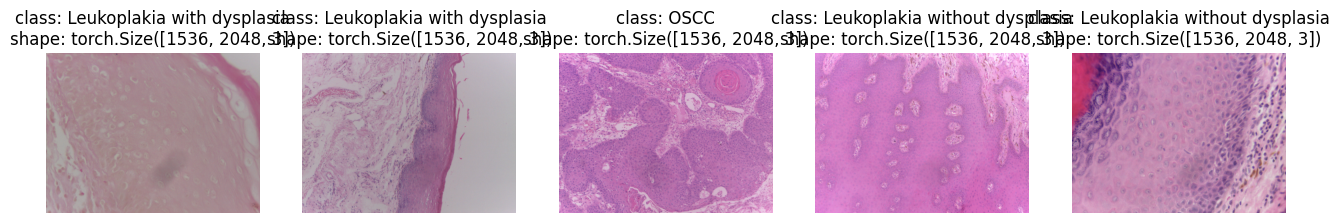

In [ ]:


# Display random images from ImageFolder created Dataset
display_random_images(train_data_custom,
                      n=5,
                      classes=classes,
                      seed=None)


In [ ]:
train_data_custom[0][0]

tensor([[[0.9255, 0.9216, 0.8824,  ..., 1.0000, 1.0000, 1.0000],
         [0.9608, 0.9373, 0.8863,  ..., 1.0000, 1.0000, 1.0000],
         [0.9922, 0.9608, 0.8784,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9922, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9647, 0.9647, 0.9647]],

        [[0.5725, 0.5608, 0.5333,  ..., 0.9451, 0.9765, 0.9922],
         [0.5765, 0.5647, 0.5451,  ..., 0.9373, 0.9725, 0.9804],
         [0.5922, 0.5804, 0.5451,  ..., 0.8588, 0.9176, 0.9255],
         ...,
         [0.7137, 0.6863, 0.6745,  ..., 1.0000, 1.0000, 1.0000],
         [0.7137, 0.7137, 0.6941,  ..., 0.9922, 0.9922, 0.9922],
         [0.7216, 0.7255, 0.7098,  ..., 0.9490, 0.9490, 0.9490]],

        [[0.9255, 0.9490, 0.9490,  ..., 0.9961, 1.0000, 1.0000],
         [0.9647, 0.9647, 0.9529,  ..., 1.0000, 1.0000, 1.0000],
         [0.9922, 1.0000, 0.9529,  ..., 1.0000, 1.0000, 1.